In [1]:
from anyBSM.plotting import ScanParameter, Plotting, setAnyStyle
import anyBSM.plotting as plotting
plotting.anyLogo = {'resize': False, 'show': False, 'alpha': 0.4, 'zorder': 0, 'loc': 'lower right'}
from anyBSM import anyBSM
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cmath, math
from matplotlib.ticker import MultipleLocator
#mpl.rcParams['font.size']   = 14.0
setAnyStyle()

## Initialize 2HDM type-I (in alignment limit)

In [2]:
THDM = anyBSM('THDMI', quiet=True, progress=False, ask=False, scheme_name="OSalignment")
THDM_w_offshell_leg = anyBSM(anyBSM.built_in_models['THDMI'], quiet=True, progress=False, ask=False, scheme_name="OSa_w_1_offshell_leg")

In [3]:
@np.vectorize
def calc_klam_p2(MH,MA,tb, p2zero = True, shat = 0):
    if p2zero:
        res = THDM.lambdahhh(momenta = [0, 0, 0], parameters={'Mh2':MH,'MAh2':MA,'MHm2':MA,'M':MH,'TanBeta':tb,'SinBmA':1}) # momenta = [0, 0, 0] corresponds to default setting
    else:
        res = THDM_w_offshell_leg.lambdahhh(momenta = [shat**2, 125.1**2, 125.1**2], parameters={'Mh2':MH,'MAh2':MA,'MHm2':MA,'M':MH,'TanBeta':tb,'SinBmA':1})
    return res['total'], res['treelevel']

# BP1

In [5]:
shat_min, shat_max = 0, 1500
shat_range = np.linspace(shat_min, shat_max, 300)

res_p2_scan = calc_klam_p2(400, 800, 2, p2zero=False, shat = shat_range)
res_p2_scan_Re = np.real(res_p2_scan[0]/res_p2_scan[1]) # obtain kappa_lambda and take the real part
res_p2_scan_Im = np.imag(res_p2_scan[0]) # obtain the imaginary part of lambdahhh

res_p2_zero = calc_klam_p2(400, 800, 2, p2zero=True)
res_p2_zero = np.real(res_p2_zero[0]/res_p2_zero[1]) # obtain kappa_lambda

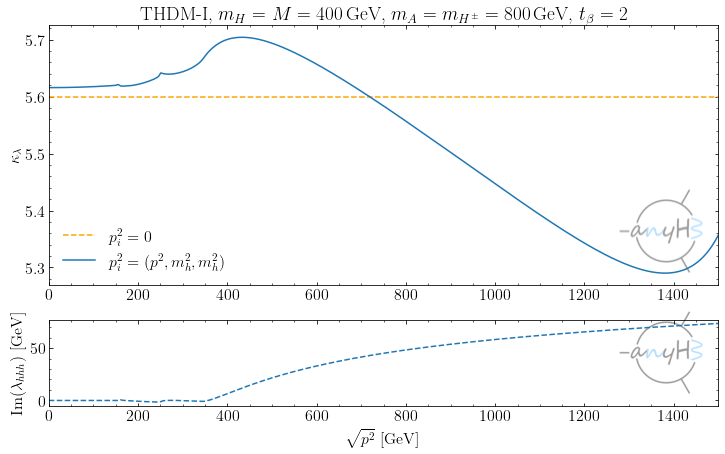

In [6]:
fig = plt.figure(figsize = (12, 7))
spec = mpl.gridspec.GridSpec(ncols=1, nrows=2, height_ratios = [3, 1])
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])

ax1.hlines(res_p2_zero, shat_min, shat_max, ls='--', colors=['orange'], label=r'$p_i^2 = 0$')
ax1.plot(shat_range, res_p2_scan_Re, label=r'$p_i^2 = (p^2, m_h^2, m_h^2)$')

ax2.plot(shat_range, res_p2_scan_Im, ls='--')
ax2.set_xlabel(r'$\sqrt{p^2}$ [GeV]')
ax1.set_ylabel(r'$\kappa_\lambda$')
ax2.set_ylabel(r'Im$(\lambda_{hhh}$) [GeV]')

ax1.set_xlim([shat_min, shat_max])
ax2.set_xlim([shat_min, shat_max])


ax1.legend(frameon=False,loc='lower left')

ax1.set_title(r'THDM-I, $m_H = M= 400\,\rm{GeV}$, $m_A=m_{H^\pm}=800\,\rm{GeV}$, $t_\beta=2$')
plt.show()

# BP2

In [21]:
shat_min, shat_max = 0, 1500
shat_range = np.linspace(shat_min, shat_max, 500)

res_p2_scan = calc_klam_p2(400, 700, 2, p2zero=False, shat = shat_range)
res_p2_scan_Re = np.real(res_p2_scan[0]/res_p2_scan[1]) # obtain kappa_lambda and take the real part
res_p2_scan_Im = np.imag(res_p2_scan[0]) # obtain the imaginary part of lambdahhh

res_p2_zero = calc_klam_p2(400, 700, 2, p2zero=True)
res_p2_zero = np.real(res_p2_zero[0]/res_p2_zero[1]) # obtain kappa_lambda

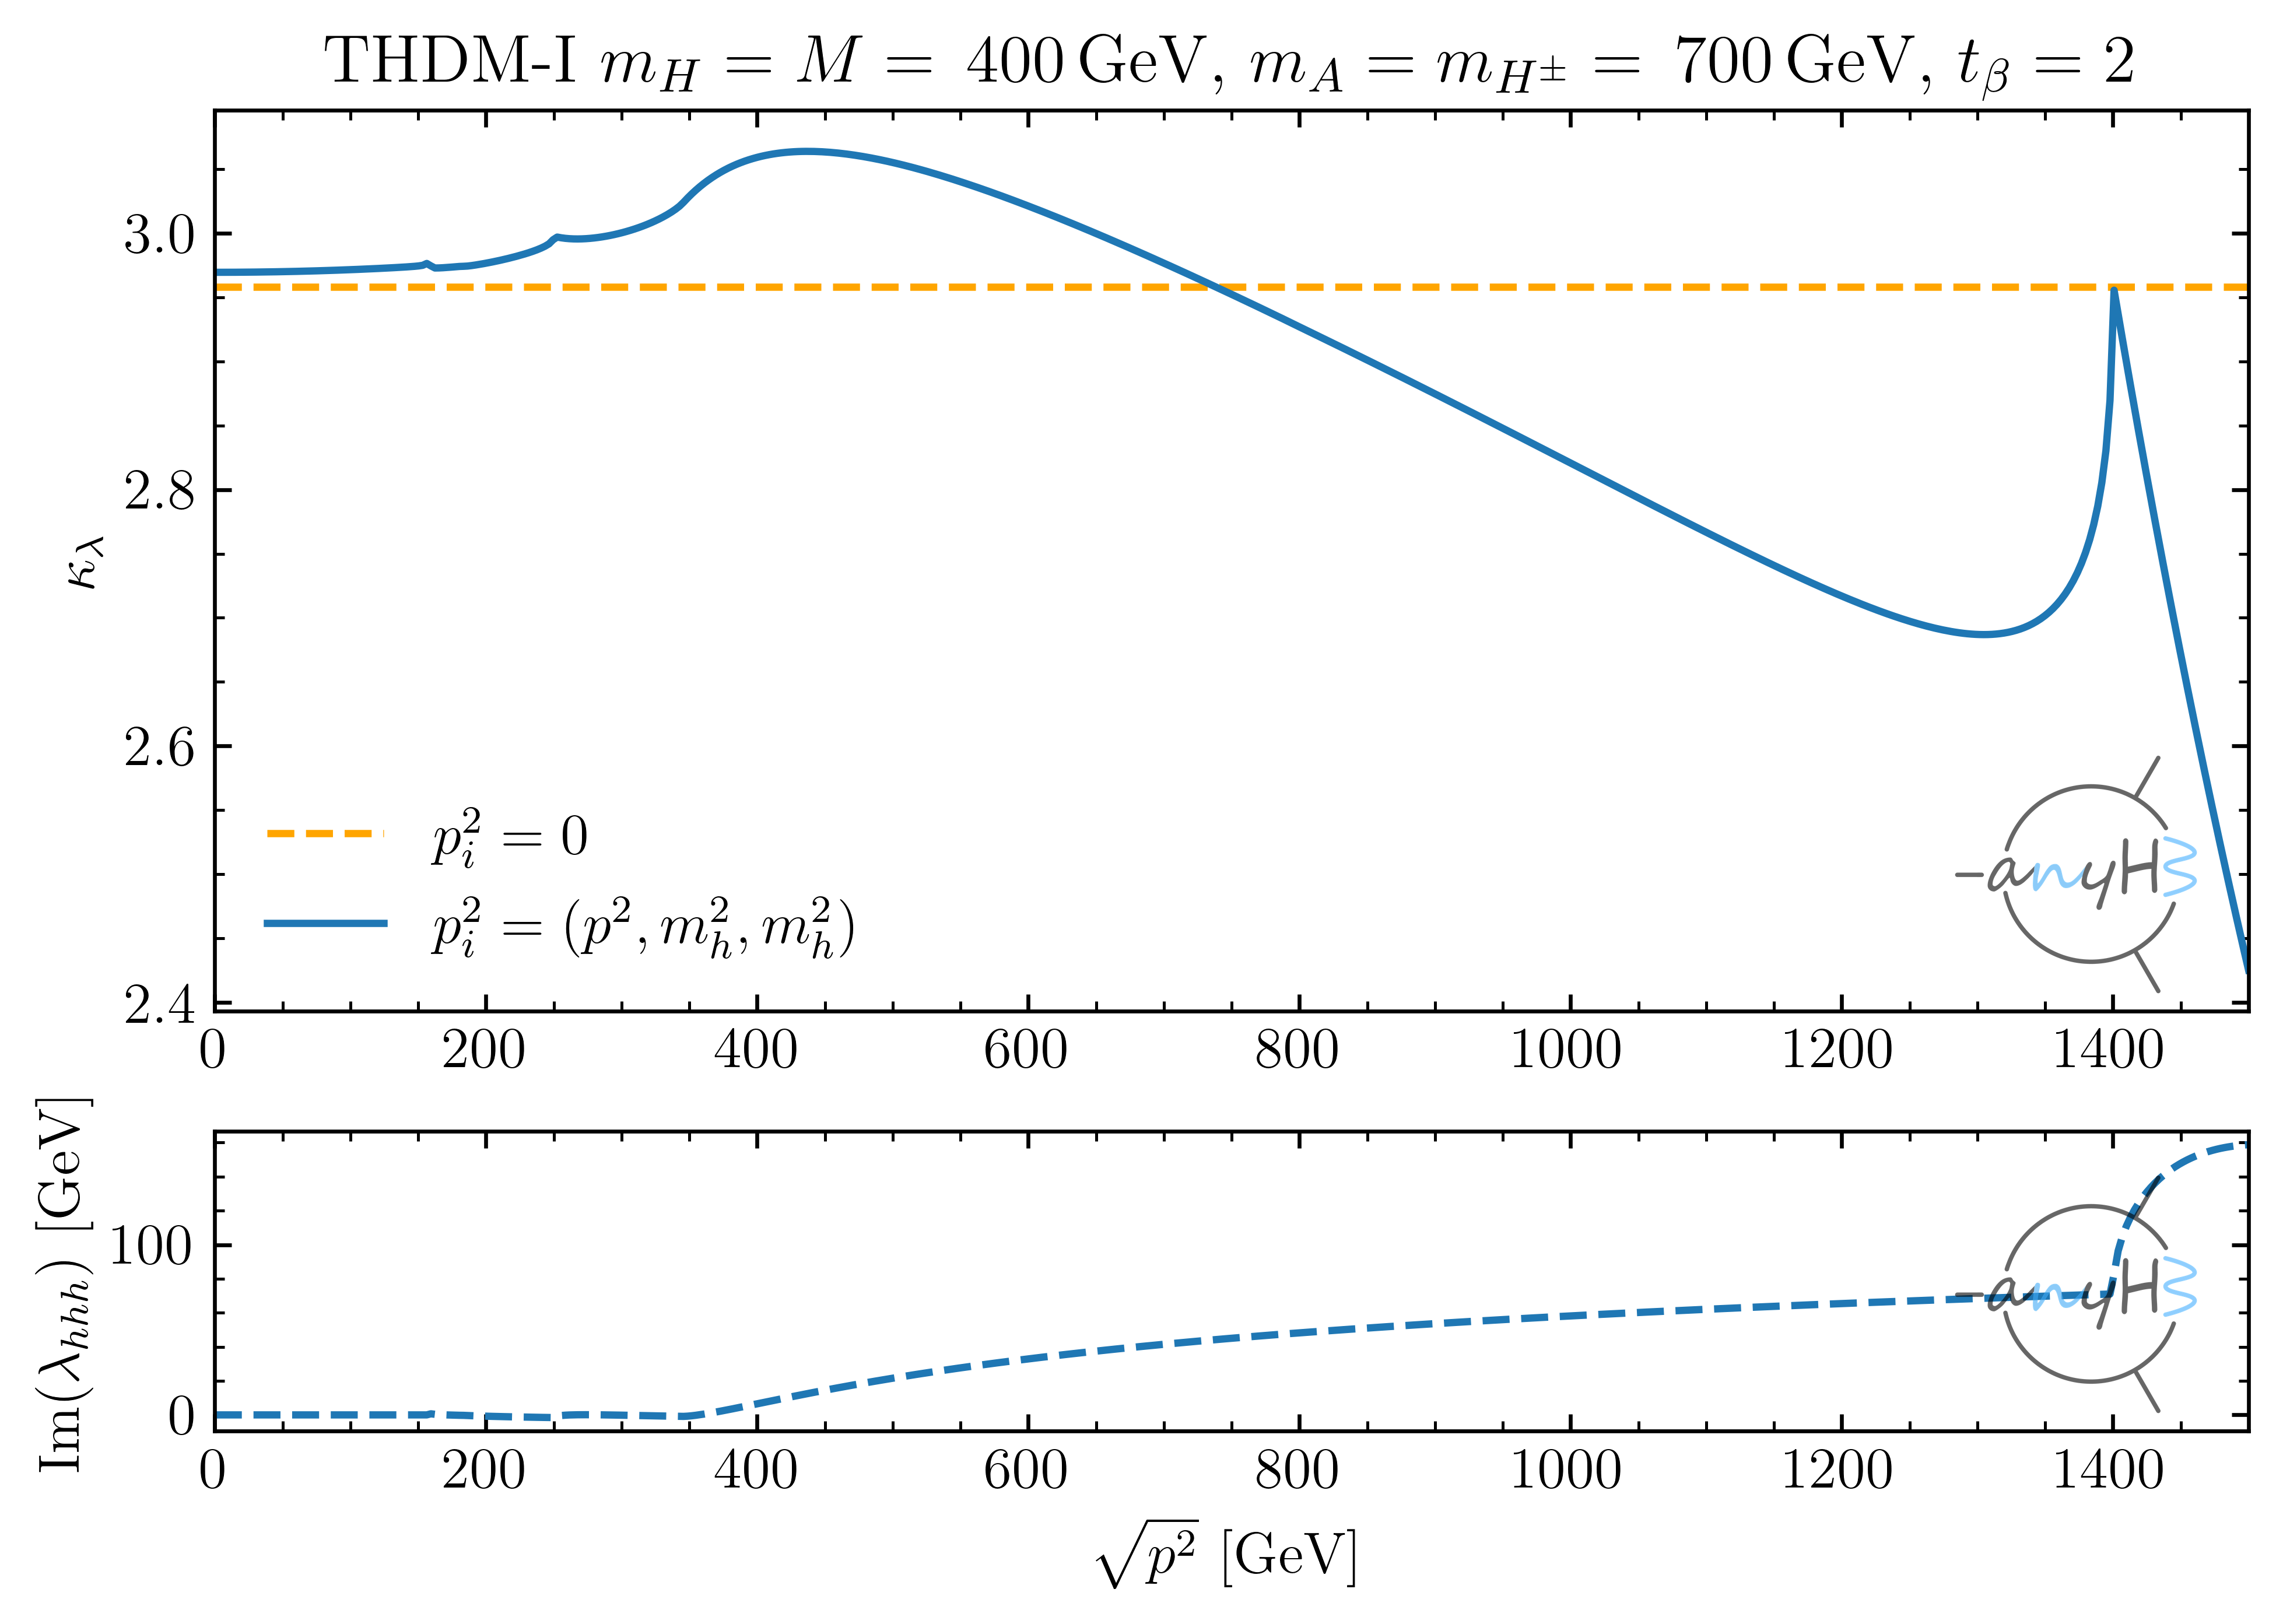

In [22]:
mpl.rcParams['font.size']   = 12.0
fig = plt.figure(figsize = (7.5, 5))
fig.dpi=600
spec = mpl.gridspec.GridSpec(ncols=1, nrows=2, height_ratios = [3, 1])
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])

ax1.hlines(res_p2_zero, shat_min, shat_max, ls='--', colors=['orange'], label=r'$p_i^2 = 0$')
ax1.plot(shat_range, res_p2_scan_Re, label=r'$p_i^2 = (p^2, m_h^2, m_h^2)$')

ax2.plot(shat_range, res_p2_scan_Im, ls='--')

ax2.set_xlabel(r'$\sqrt{p^2}$ [GeV]',fontsize=12)
ax1.set_ylabel(r'$\kappa_\lambda$',fontsize=12)
ax2.set_ylabel(r'Im$(\lambda_{hhh}$) [GeV]',fontsize=12)

ax1.set_xlim([shat_min, shat_max])
ax2.set_xlim([shat_min, shat_max])

ax1.legend(frameon=False,loc='lower left',fontsize=12)

plotting.place_logo(fig,0.74,0.35, resize=0.3, alpha=0.6, logo_name='anyH3_logo_large.png')
plotting.place_logo(fig,0.74,0.11, resize=0.3, alpha=0.6, logo_name='anyH3_logo_large.png')

ax1.set_title(r'THDM-I $m_H = M=\,400\,\rm{GeV}$, $m_A=m_{H^\pm}=\,700\,\rm{GeV}$, $t_\beta=2$',fontsize=14)
plt.savefig('./THDM-I_p2_dep_BP2.pdf', bbox_inches='tight',dpi=fig.dpi)
plt.show()

# BP3

In [23]:
shat_min, shat_max = 0, 1500
shat_range = np.linspace(shat_min, shat_max, 300)

res_p2_scan = calc_klam_p2(600, 1000, 2, p2zero=False, shat = shat_range)
res_p2_scan_Re = np.real(res_p2_scan[0]/res_p2_scan[1]) # obtain kappa_lambda and take the real part
res_p2_scan_Im = np.imag(res_p2_scan[0]) # obtain the imaginary part of lambdahhh

res_p2_zero = calc_klam_p2(600, 1000, 2, p2zero=True)
res_p2_zero = np.real(res_p2_zero[0]/res_p2_zero[1]) # obtain kappa_lambda

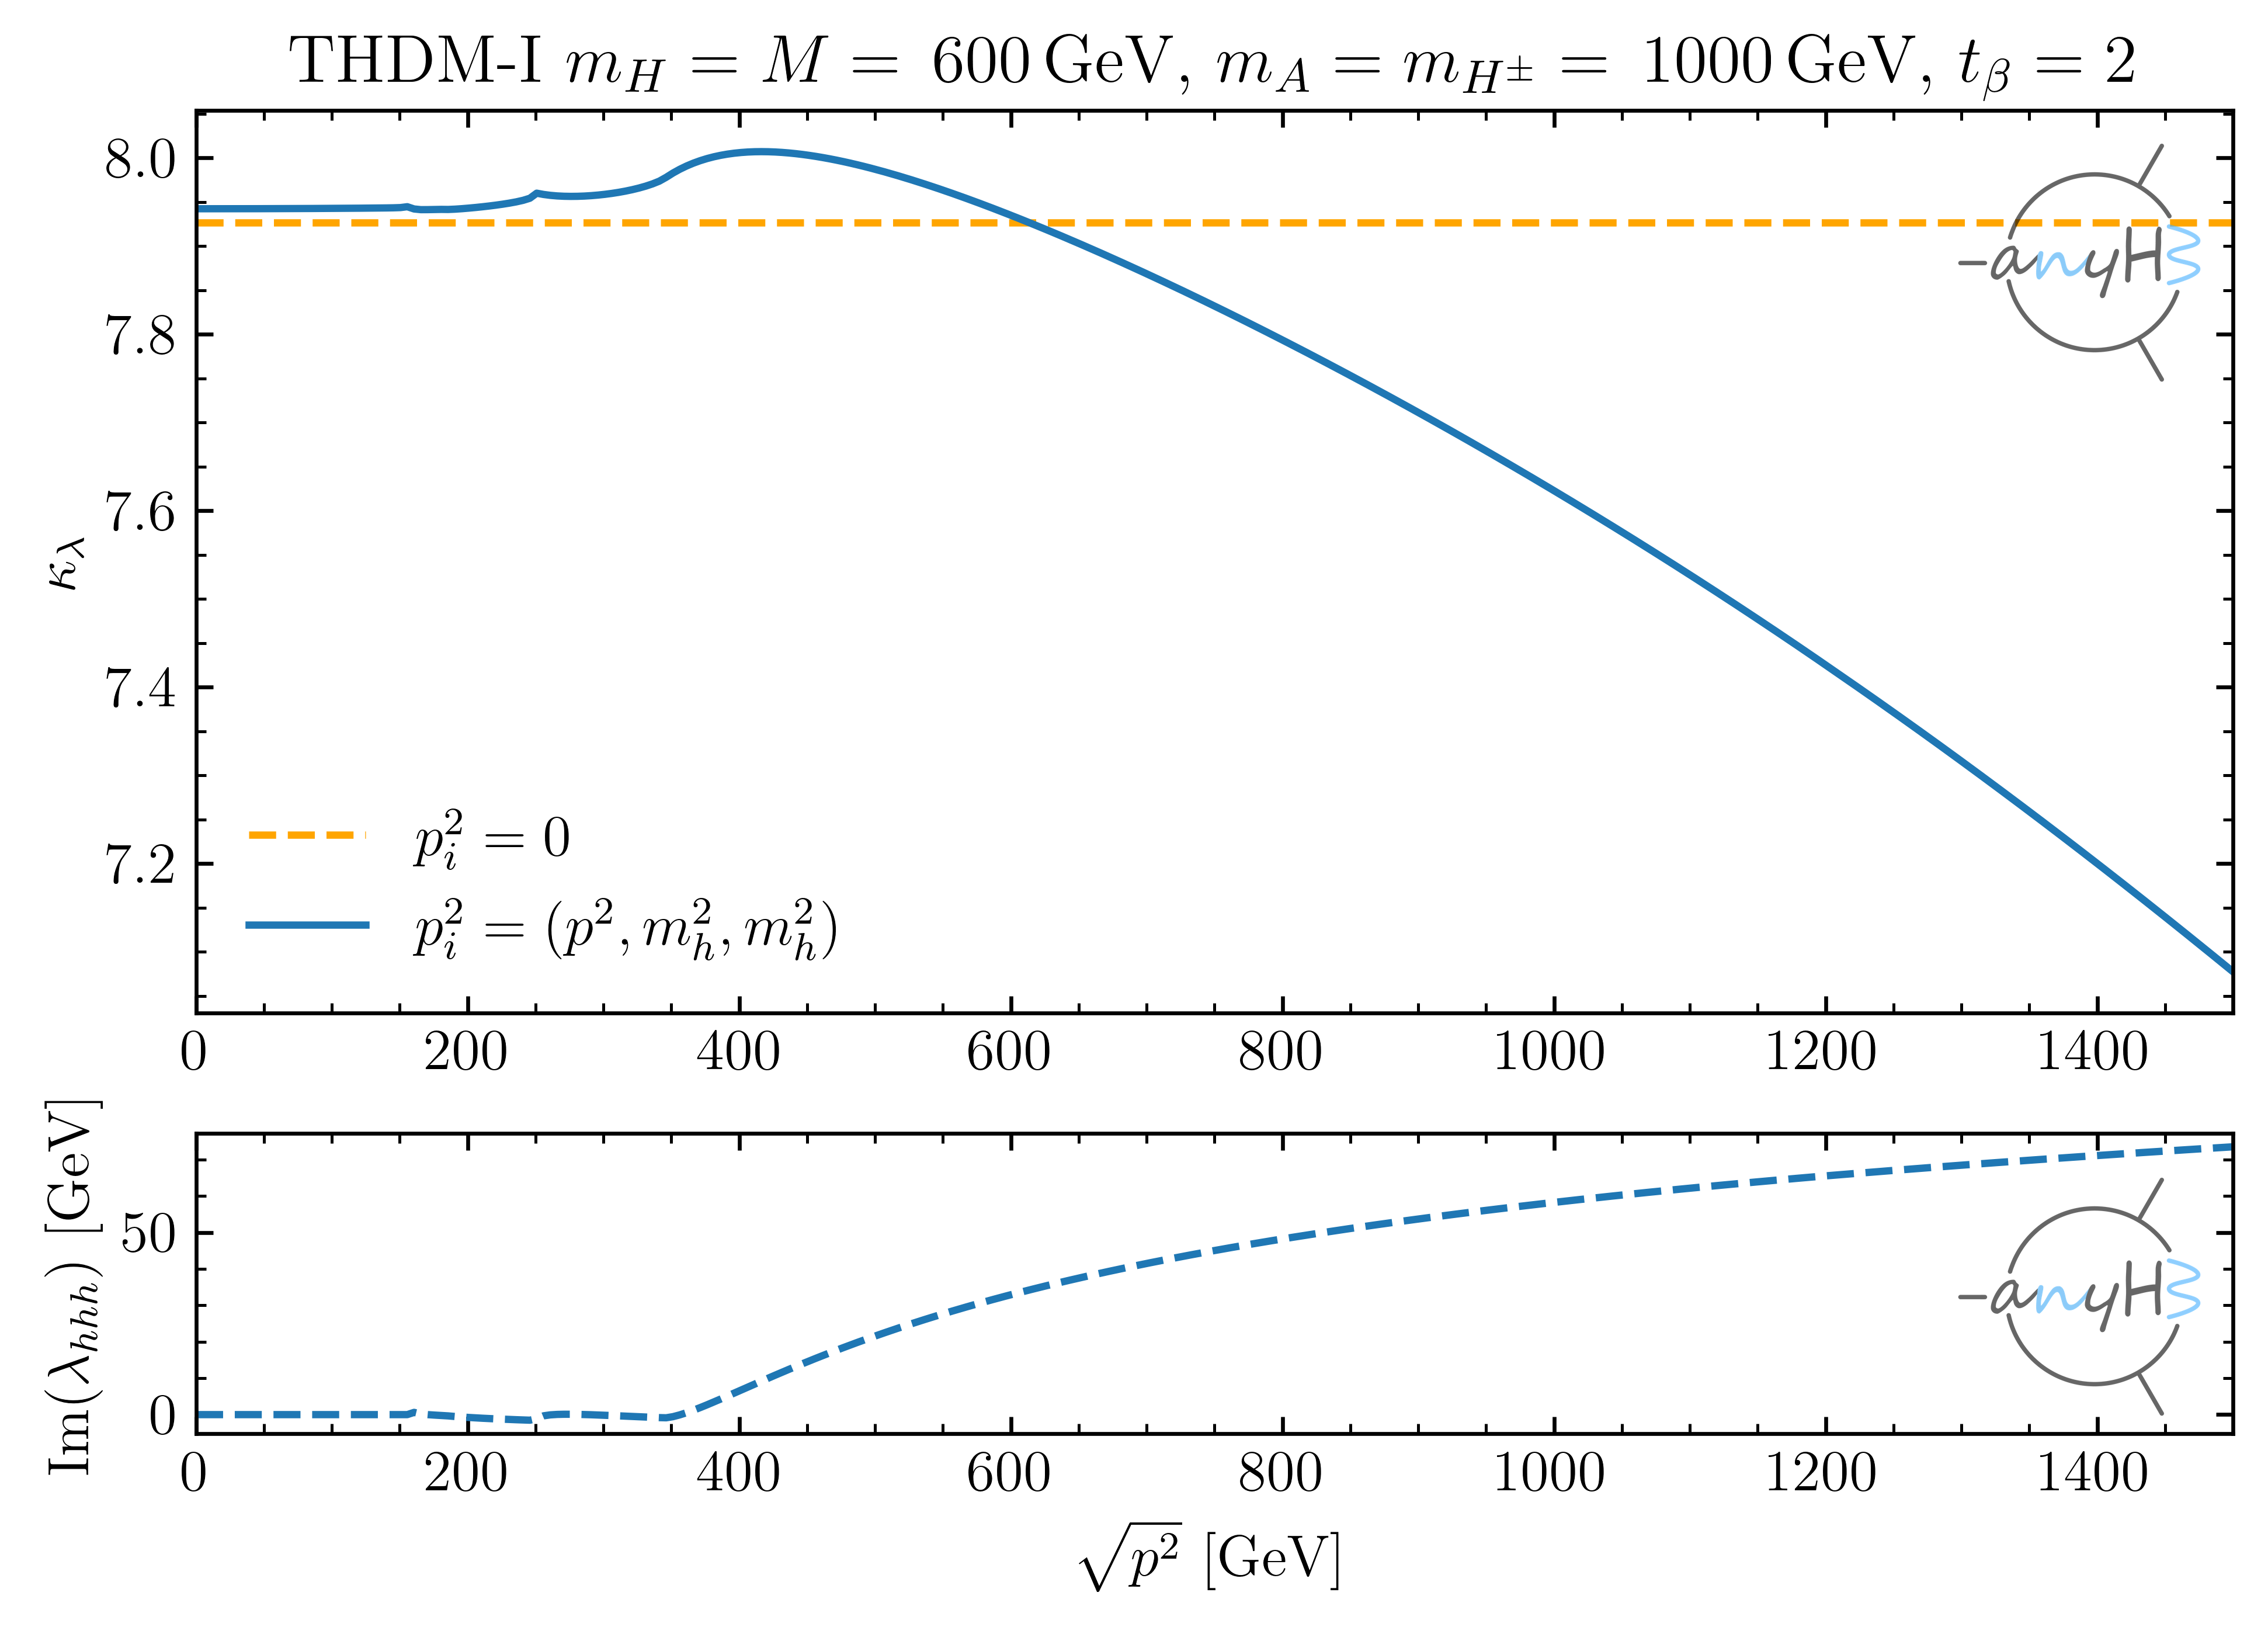

In [24]:
fig = plt.figure(figsize = (7.5,5))
fig.dpi=600
spec = mpl.gridspec.GridSpec(ncols=1, nrows=2, height_ratios = [3, 1])
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])

ax1.hlines(res_p2_zero, shat_min, shat_max, ls='--', colors=['orange'], label=r'$p_i^2 = 0$')
ax1.plot(shat_range, res_p2_scan_Re, label=r'$p_i^2 = (p^2, m_h^2, m_h^2)$')

ax2.plot(shat_range, res_p2_scan_Im, ls='--')

ax2.set_xlabel(r'$\sqrt{p^2}$ [GeV]',fontsize=12)
ax1.set_ylabel(r'$\kappa_\lambda$',fontsize=12)
ax2.set_ylabel(r'Im$(\lambda_{hhh}$) [GeV]',fontsize=12)

ax1.set_xlim([shat_min, shat_max])
ax2.set_xlim([shat_min, shat_max])

ax1.legend(frameon=False,loc='lower left',fontsize=12)

plotting.place_logo(fig,0.74,0.7, resize=0.3, alpha=0.6, logo_name='anyH3_logo_large.png')
plotting.place_logo(fig,0.74,0.11, resize=0.3, alpha=0.6, logo_name='anyH3_logo_large.png')


ax1.set_title(r'THDM-I $m_H = M=\,600\,\rm{GeV}$, $m_A=m_{H^\pm}=\,1000\,\rm{GeV}$, $t_\beta=2$',fontsize=14)
plt.savefig('./THDM-I_p2_dep_BP3.pdf', bbox_inches='tight',dpi=fig.dpi)
plt.show()